## Final Project Submission

Please fill out:


- Group 2


Student name: 


***Alvin	Kimathi***

***Lynn	Oloo***

***Hawkins	Murithi***

***Firdosa	Mohamed***


* Student pace: FULL TIME/HYBRID

* Scheduled project review date/time: 2nd MAY 2024

* Instructor name: MARYANN MWIKALI

* Blog post URL:


# DATA UNDERSTANDING

***Importing libraries***

In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


***Reading the Kc_house_data.csv Dataset***

In [2]:
df = pd.read_csv("data/kc_house_data.csv", index_col = 0)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21597, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

- The dataset contains 21,597 entries and 20 columns. 
- Some columns have missing values, such as "waterfront", "view", and "yr_renovated". 
- The data types include integers, floats, and objects (likely representing categorical variables).

***Reading the column_names.md Dataset***

In [5]:
with open('data/column_names.md', 'r') as file:
    md_lines = file.readlines()

df_col = pd.DataFrame({'Text': md_lines})

df_col

,Text
0,# Column Names and Descriptions for King Count...
1,* `id` - Unique identifier for a house\n
2,* `date` - Date house was sold\n
3,* `price` - Sale price (prediction target)\n
4,* `bedrooms` - Number of bedrooms\n
5,* `bathrooms` - Number of bathrooms\n
6,* `sqft_living` - Square footage of living spa...
7,* `sqft_lot` - Square footage of the lot\n
8,* `floors` - Number of floors (levels) in house\n
9,* `waterfront` - Whether the house is on a wat...


In [6]:
df_col.describe()

,Text
count,26
unique,26
top,# Column Names and Descriptions for King Count...
freq,1


In [7]:
df_col.shape

(26, 1)

In [8]:
df_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    26 non-null     object
dtypes: object(1)
memory usage: 336.0+ bytes


- The provided dataset consists of a single column named "Text" with 26 entries. 
- Each entry is of type object (likely representing strings or text data). 
- There are no missing values in the dataset.
- It seems to be a small dataset containing textual data, possibly representing individual text samples, comments, or descriptions.

# DATA CLEANING

***Kc_house_data.csv Dataset***

At this point check for the existing columns and understand what the entail.

In [9]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

Choose the best-looking predictors to include in the model.

In [10]:
new_df = df[['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'waterfront','view', 'condition', 'grade','yr_built','bathrooms','floors','yr_renovated','zipcode']]
new_df

,price,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,yr_built,bathrooms,floors,yr_renovated,zipcode
id,,,,,,,,,,,,,
7129300520,221900.0,3,1180,5650,NaN,NONE,Average,7 Average,1955,1.00,1.0,0.0,98178
6414100192,538000.0,3,2570,7242,NO,NONE,Average,7 Average,1951,2.25,2.0,1991.0,98125
5631500400,180000.0,2,770,10000,NO,NONE,Average,6 Low Average,1933,1.00,1.0,NaN,98028
2487200875,604000.0,4,1960,5000,NO,NONE,Very Good,7 Average,1965,3.00,1.0,0.0,98136
1954400510,510000.0,3,1680,8080,NO,NONE,Average,8 Good,1987,2.00,1.0,0.0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,1530,1131,NO,NONE,Average,8 Good,2009,2.50,3.0,0.0,98103
6600060120,400000.0,4,2310,5813,NO,NONE,Average,8 Good,2014,2.50,2.0,0.0,98146
1523300141,402101.0,2,1020,1350,NO,NONE,Average,7 Average,2009,0.75,2.0,0.0,98144


In [11]:
# Truncate the bedrooms bathrooms and floors columns as we cannot have 1/2 a bedroom, bathroom or floor.
def truncate_columns(new_df, columns):
    for column in columns:
        new_df[column] = new_df[column].apply(lambda x: int(x))
    
    return new_df

In [12]:
truncate_columns(new_df, ['bedrooms', 'bathrooms', 'floors'])

,price,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,yr_built,bathrooms,floors,yr_renovated,zipcode
id,,,,,,,,,,,,,
7129300520,221900.0,3,1180,5650,NaN,NONE,Average,7 Average,1955,1,1,0.0,98178
6414100192,538000.0,3,2570,7242,NO,NONE,Average,7 Average,1951,2,2,1991.0,98125
5631500400,180000.0,2,770,10000,NO,NONE,Average,6 Low Average,1933,1,1,NaN,98028
2487200875,604000.0,4,1960,5000,NO,NONE,Very Good,7 Average,1965,3,1,0.0,98136
1954400510,510000.0,3,1680,8080,NO,NONE,Average,8 Good,1987,2,1,0.0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,1530,1131,NO,NONE,Average,8 Good,2009,2,3,0.0,98103
6600060120,400000.0,4,2310,5813,NO,NONE,Average,8 Good,2014,2,2,0.0,98146
1523300141,402101.0,2,1020,1350,NO,NONE,Average,7 Average,2009,0,2,0.0,98144


In [13]:
#Waterfront' column transformation
new_df['waterfront'].replace(to_replace=['NO', 'YES'], value=[0, 1], inplace=True)

Use `.info()` to check for missing data in the columns

In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21597 non-null  float64
 1   bedrooms      21597 non-null  int64  
 2   sqft_living   21597 non-null  int64  
 3   sqft_lot      21597 non-null  int64  
 4   waterfront    19221 non-null  float64
 5   view          21534 non-null  object 
 6   condition     21597 non-null  object 
 7   grade         21597 non-null  object 
 8   yr_built      21597 non-null  int64  
 9   bathrooms     21597 non-null  int64  
 10  floors        21597 non-null  int64  
 11  yr_renovated  17755 non-null  float64
 12  zipcode       21597 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 2.3+ MB


we see that the column `view` has some missing data but since they are very few and will have little or no effect on our analysis we decide to use `dropna` to drop the rows.

In [15]:
new_df = new_df.dropna()

we again do `.info()` to see the output of our analysis.

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 6414100192 to 1523300157
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         15762 non-null  float64
 1   bedrooms      15762 non-null  int64  
 2   sqft_living   15762 non-null  int64  
 3   sqft_lot      15762 non-null  int64  
 4   waterfront    15762 non-null  float64
 5   view          15762 non-null  object 
 6   condition     15762 non-null  object 
 7   grade         15762 non-null  object 
 8   yr_built      15762 non-null  int64  
 9   bathrooms     15762 non-null  int64  
 10  floors        15762 non-null  int64  
 11  yr_renovated  15762 non-null  float64
 12  zipcode       15762 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.7+ MB


At this point we now see that all our columns have the same no of rows having non- null values hence we are ready to fodge a step forward.

# EXPLORATORY DATA ANALYSIS

This stage involve exploration process, which involves generating and plotting histograms and box plots. This step allows us to gain insight into the distribution patterns of the data for each variable. By visualizing the histograms, we can better comprehend the spread and frequency of values within each variable, providing a foundation for further analysis. Box plots help us identify potential outliers.

### Descriptive Statistics

In [17]:
new_df.describe()

,price,bedrooms,sqft_living,sqft_lot,waterfront,yr_built,bathrooms,floors,yr_renovated,zipcode
count,1.576200e+04,15762.000000,15762.000000,1.576200e+04,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000
mean,5.413172e+05,3.378949,2084.512372,1.528082e+04,0.007613,1971.111217,1.753711,1.447659,82.440236,98077.558241
std,3.722258e+05,0.935301,918.617686,4.182288e+04,0.086924,29.336823,0.733333,0.551130,397.212626,53.414906
min,8.200000e+04,1.000000,370.000000,5.200000e+02,0.000000,1900.000000,0.000000,1.000000,0.000000,98001.000000
25%,3.210000e+05,3.000000,1430.000000,5.048500e+03,0.000000,1952.000000,1.000000,1.000000,0.000000,98033.000000
50%,4.500000e+05,3.000000,1920.000000,7.602000e+03,0.000000,1975.000000,2.000000,1.000000,0.000000,98065.000000
75%,6.448750e+05,4.000000,2550.000000,1.072000e+04,0.000000,1997.000000,2.000000,2.000000,0.000000,98117.000000
max,7.700000e+06,33.000000,13540.000000,1.651359e+06,1.000000,2015.000000,8.000000,3.000000,2015.000000,98199.000000


In [18]:
new_df.shape

(15762, 13)

### Converting the "grade"  column into the  "grade value"  and   "grade description"

- First lets check the unique values in grade and lets convert it into numeric values


In [19]:
new_df.grade.unique()

array(['7 Average', '8 Good', '11 Excellent', '9 Better', '6 Low Average',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [20]:
# Define a function to extract the numeric grade from the grade column
def extract_numeric_grade(s):
    numeric_str = ''
    for char in s:
        if char.isdigit():
            numeric_str += char
    return int(numeric_str)

# Define a function to extract the grade description from the grade column
def extract_grade_desc(s):
    grade_desc = ''
    for char in s:
        if not char.isdigit() and char != ' ':
            grade_desc += char
    return grade_desc.strip()

# Extract the numeric grade and grade description using the custom functions
new_df['grade_value'] = new_df['grade'].apply(lambda x: extract_numeric_grade(x))
new_df['grade_desc'] = new_df['grade'].apply(lambda x: extract_grade_desc(x))

new_df.head()

,price,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,yr_built,bathrooms,floors,yr_renovated,zipcode,grade_value,grade_desc
id,,,,,,,,,,,,,,,
6414100192,538000.0,3,2570,7242,0.0,NONE,Average,7 Average,1951,2,2,1991.0,98125,7,Average
2487200875,604000.0,4,1960,5000,0.0,NONE,Very Good,7 Average,1965,3,1,0.0,98136,7,Average
1954400510,510000.0,3,1680,8080,0.0,NONE,Average,8 Good,1987,2,1,0.0,98074,8,Good
7237550310,1230000.0,4,5420,101930,0.0,NONE,Average,11 Excellent,2001,4,1,0.0,98053,11,Excellent
1321400060,257500.0,3,1715,6819,0.0,NONE,Average,7 Average,1995,2,2,0.0,98003,7,Average


### Checking for outliers

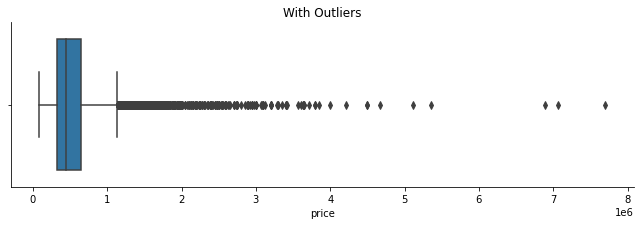

In [21]:
# An outlier is an obervation that lies in an abnormal distance from other values
# Outliers affect the data quality and hence the accuracy of the final model

sns.catplot(x='price', data=new_df, kind='box', height=3, aspect=3).set(title="With Outliers")

### Dealing with outliers
- An outlier is an obervation that lies in an abnormal distance from other values

- Outliers affect the data quality and hence the accuracy of the final model

- You can deal with the outliers by removing them to improve the quality of the model

In [22]:
#function to remove outliers
def remove_outliers(new_df, cols):
    for col in cols:
        z = np.abs(stats.zscore(new_df[col]))
        threshold = 3
        new_df = new_df[z < threshold]
    return new_df

In [23]:
cols_to_remove_outliers = ['sqft_living','bedrooms','price',]
new_df = remove_outliers(new_df, cols_to_remove_outliers)

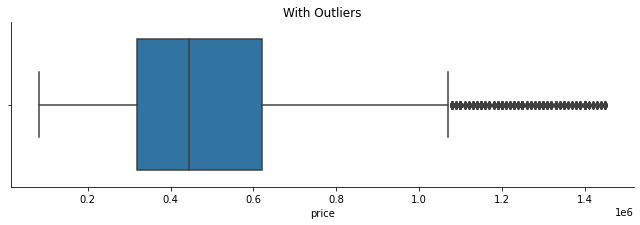

In [24]:
sns.catplot(x='price', data=new_df, kind='box', height=3, aspect=3).set(title="With Outliers")

###  One-Hot Coding with Pandas & Avoiding Dummy Variable Traps
- One-hot encoding is a great way to transform categorical variable in a model I will use one-hot coding to create multiple dummy varriables for each category of condition and grade variable I will use the pandas' get_dummies method in this approach

In [25]:
new_df['condition'].value_counts()

Average      9892
Good         4022
Very Good    1196
Fair          129
Poor           18
Name: condition, dtype: int64

In [26]:
new_df['grade'].value_counts()

7 Average        6520
8 Good           4408
9 Better         1829
6 Low Average    1482
10 Very Good      669
5 Fair            167
11 Excellent      157
4 Low              16
12 Luxury           8
3 Poor              1
Name: grade, dtype: int64

In [27]:
# Making a copy of the categorical variables to prepare them for one-hot encoding
copies_df = new_df[["condition", "grade"]].copy()
copies_df.sample(10, random_state=1)

,condition,grade
id,,
6450302900,Good,7 Average
1545803390,Average,7 Average
6791000280,Good,7 Average
1072030510,Good,8 Good
7205000180,Good,7 Average
3329510850,Average,7 Average
5364200381,Average,8 Good
461004720,Good,7 Average
1223089083,Average,10 Very Good


In [28]:
pd.get_dummies(new_df, columns=["condition", "grade"]).head()

,price,bedrooms,sqft_living,sqft_lot,waterfront,view,yr_built,bathrooms,floors,yr_renovated,...,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
id,,,,,,,,,,,,,,,,,,,,,
6414100192,538000.0,3,2570,7242,0.0,NONE,1951,2,2,1991.0,...,0,0,0,0,0,0,0,1,0,0
2487200875,604000.0,4,1960,5000,0.0,NONE,1965,3,1,0.0,...,0,0,0,0,0,0,0,1,0,0
1954400510,510000.0,3,1680,8080,0.0,NONE,1987,2,1,0.0,...,0,0,0,0,0,0,0,0,1,0
1321400060,257500.0,3,1715,6819,0.0,NONE,1995,2,2,0.0,...,0,0,0,0,0,0,0,1,0,0
2414600126,229500.0,3,1780,7470,0.0,NONE,1960,1,1,0.0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
# Eliminating perfect multicollinearity
dummies = pd.get_dummies(new_df, columns=["condition", "grade"], drop_first = True).head()

In [30]:
dummies.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view',
       'yr_built', 'bathrooms', 'floors', 'yr_renovated', 'zipcode',
       'grade_value', 'grade_desc', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very Good', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better'],
      dtype='object')

## DATA VISUALIZATION

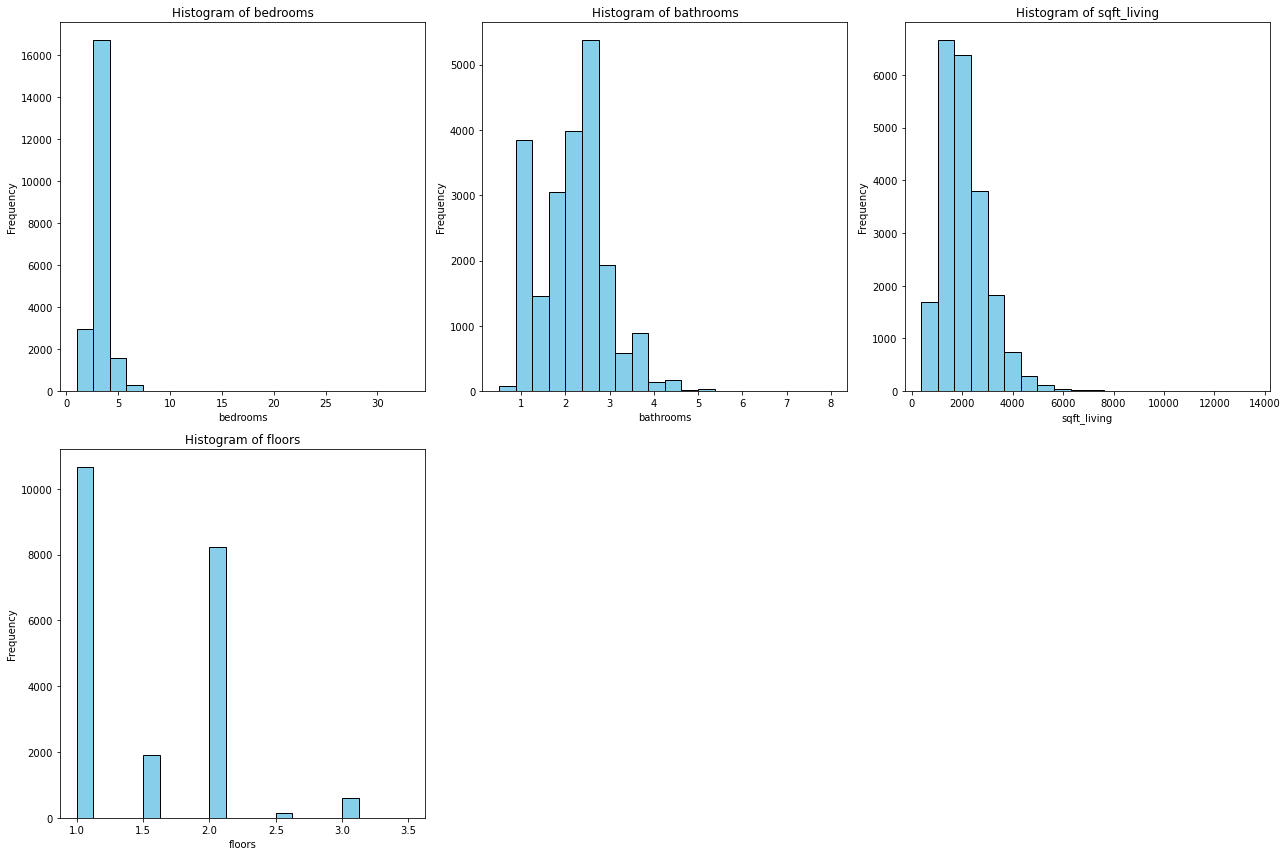

In [31]:
# Plotting Histograms for the desired features
features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']
plt.figure(figsize=(18, 12))
ncols = 3
nrows = 2

# Perform univariate analysis for each feature
for i, feature in enumerate(features):
    plt.subplot(nrows, ncols, i+1)
    plt.hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title('Histogram of ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- Suppose a real estate company wants to understand the distribution of key property attributes in a housing market, such as the number of bedrooms, bathrooms, square footage of living space and number of floors.
- Therefore, in this case Histograms provide a visual representation of the frequency or count of each attribute value within certain intervals (bins). For example, the histogram for bedrooms shows how many properties have 1, 2, 3, or more bedrooms, helping the company understand the typical bedroom count in the market.

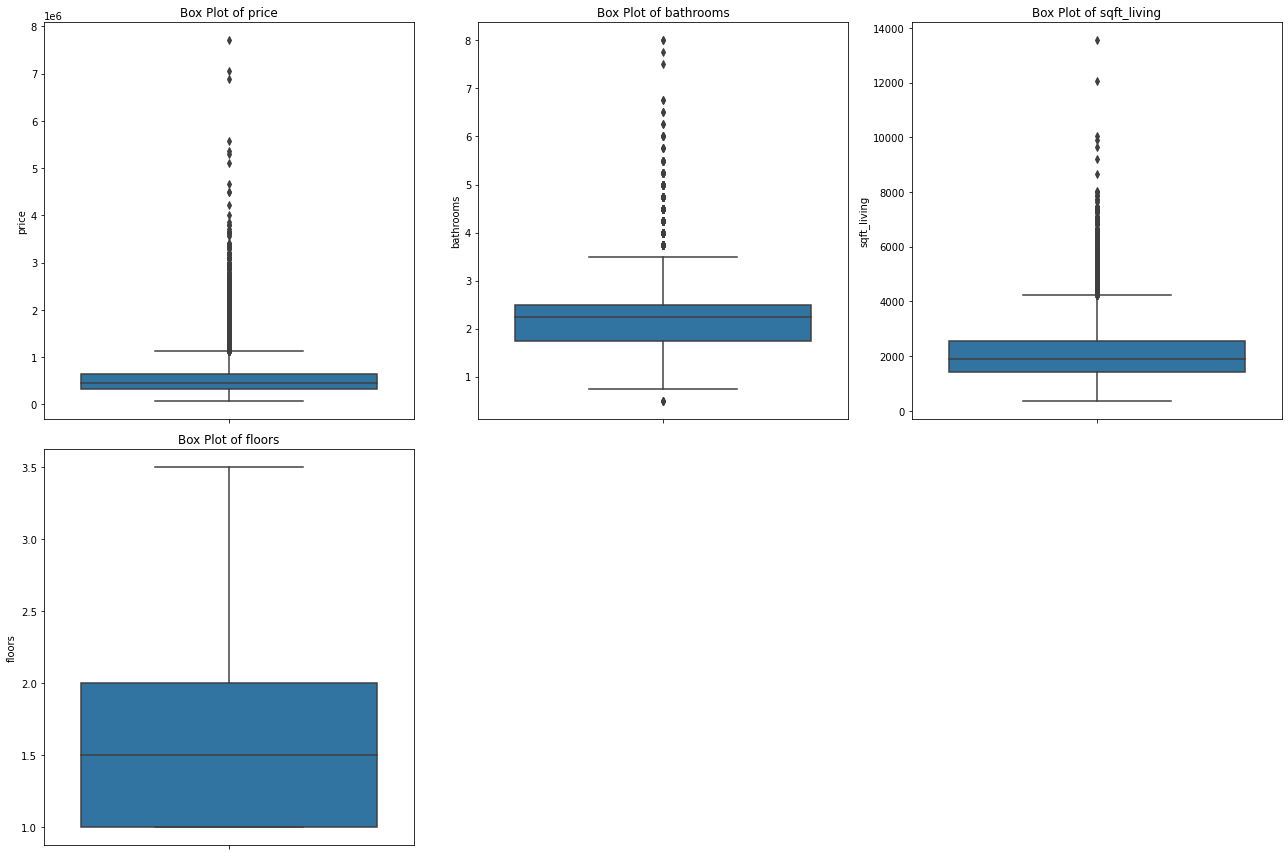

In [32]:
# Plotting box plots for the desired features
features = ['price','bathrooms', 'sqft_living', 'floors']
plt.figure(figsize=(18, 12))
ncols = 3
nrows = 2

# Perform univariate analysis for each feature
for i, feature in enumerate(features):
    plt.subplot(nrows, ncols, i+1)
    sns.boxplot(y=df[feature])
    plt.title('Box Plot of ' + feature)
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

- A real estate investor is interested in understanding the variation in prices and key property features across different listings in a housing market.
- Box plots summarize the distribution of numerical variables like price, bathrooms, square footage of living space, and floors. They provide insights into the central tendency (median) and spread (interquartile range) of these features. Outliers in the box plots can indicate properties with unusual characteristics or potentially higher/lower prices.

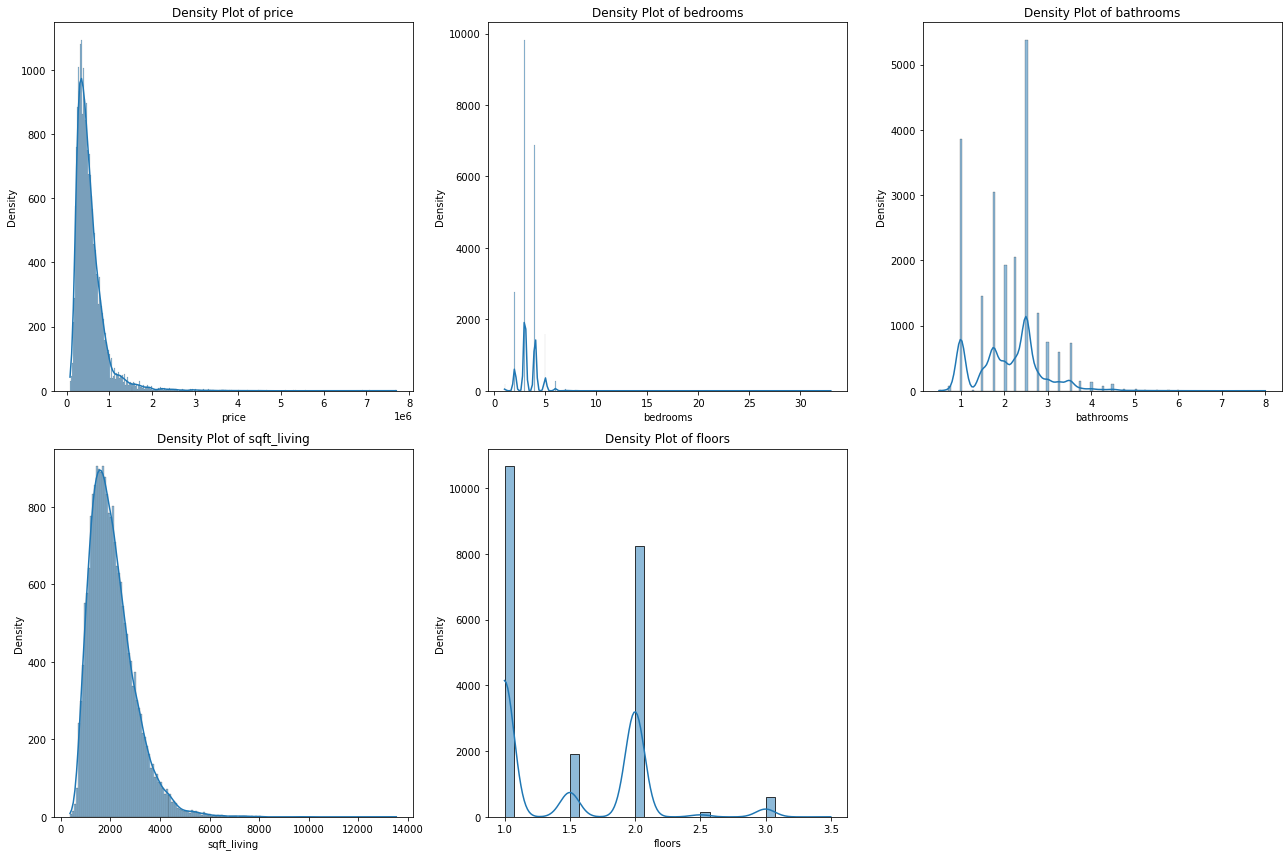

In [33]:
# Plotting density plots for the desired features
features = ['price','bedrooms','bathrooms', 'sqft_living', 'floors']
plt.figure(figsize=(18, 12))
ncols = 3
nrows = 2

# Perform univariate analysis for each feature
for i, feature in enumerate(features):
    plt.subplot(nrows, ncols, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title('Density Plot of ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

- These Density plots visualize the shape of the distribution of numerical variables like price, bedrooms, bathrooms, square footage of living space, and floors. They provide a smooth estimate of the probability density function, allowing the company to identify peaks or clusters in the data. For instance, a density plot of prices may reveal whether the majority of properties fall within a certain price range.

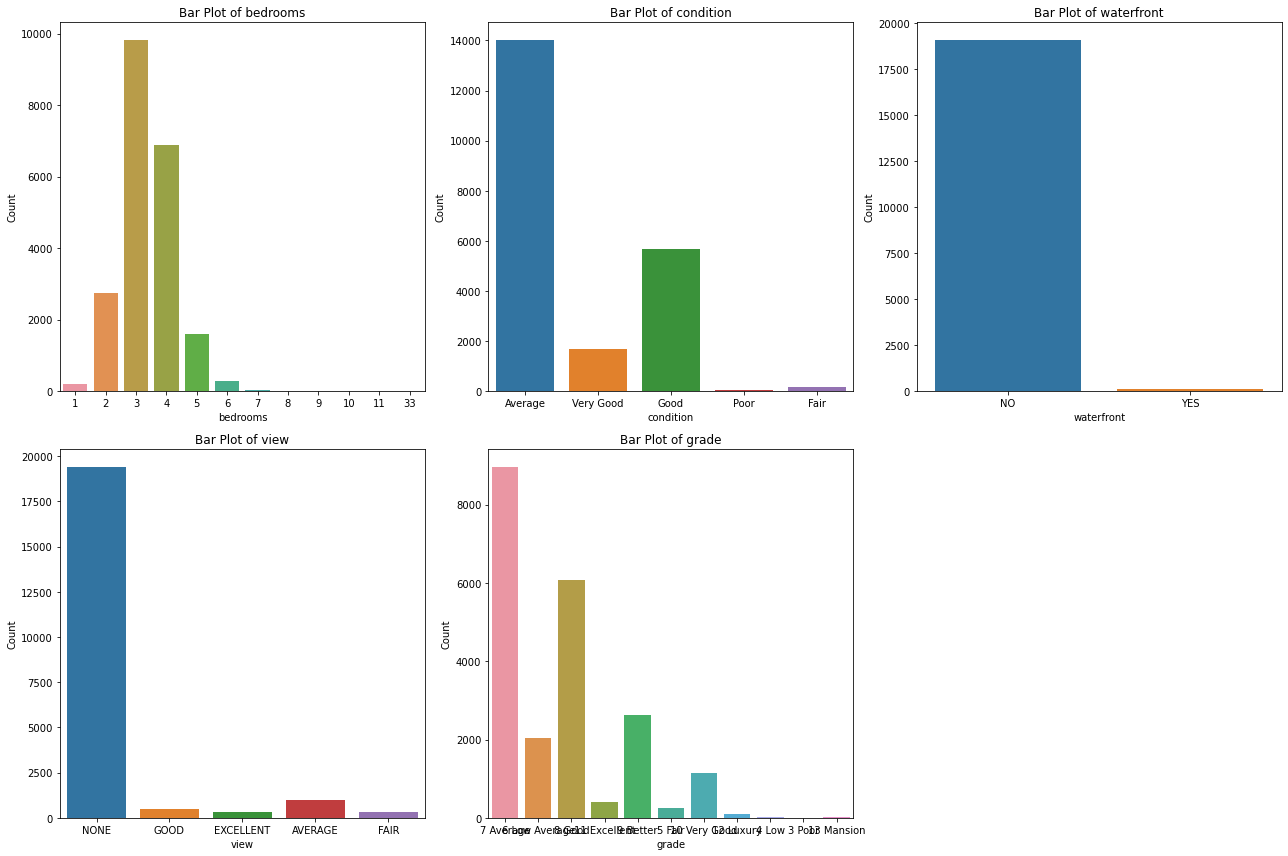

In [34]:
# Plotting bar plots for the desired features
features = ['bedrooms', 'condition', 'waterfront', 'view', 'grade']
plt.figure(figsize=(18, 12))
ncols = 3
nrows = 2

# Perform univariate analysis for each feature
for i, feature in enumerate(features):
    plt.subplot(nrows, ncols, i+1)
    sns.countplot(x=df[feature])
    plt.title('Bar Plot of ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

- In addition, Bar plots display the count or frequency of categories within each categorical variable. They help visualize the distribution of property attributes, such as the number of bedrooms (1, 2, 3, etc.), condition (poor, fair, good, excellent), waterfront status (yes or no), view (poor, average, good, excellent), and grade (from 1 to 13). This information can guide the brokerage firm in understanding the preferences of potential buyers and tailoring their marketing strategies accordingly.

## Bivariate Analysis

Bivariate analysis focuses on determining the correlation between two variables. At this stage we will use a heatmap and scatterplot to check on correlation of the variables.

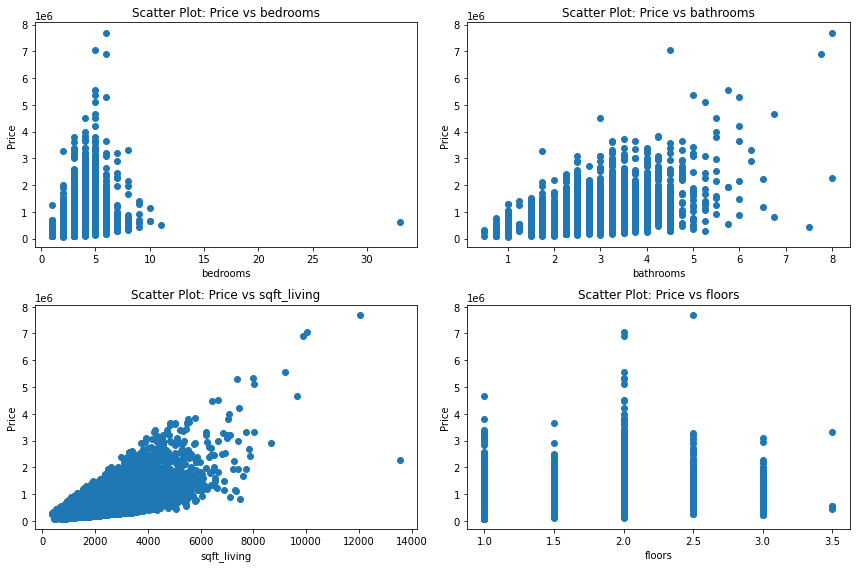

In [35]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']

# Set the figure size and grid layout
fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(12, 8))

# Perform bivariate analysis for each feature
for i, feature in enumerate(features):
    # Calculate the row and column index
    row = i // 2
    col = i % 2
    
    # Scatter Plot
    axs[row, col].scatter(df[feature], df['price'])
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Price')
    axs[row, col].set_title('Scatter Plot: Price vs ' + feature)

# Adjust the spacing between subplots
plt.tight_layout()


In [36]:
numeric_columns = df.select_dtypes(include='number').columns
numeric_df = df[numeric_columns]

In [37]:
# Computing the correlation matrix to check for Linearity
numeric_df.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852
zipcode,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,-0.261570,-0.347210,0.069846,1.000000,0.266742,-0.564259,-0.279299,-0.147294


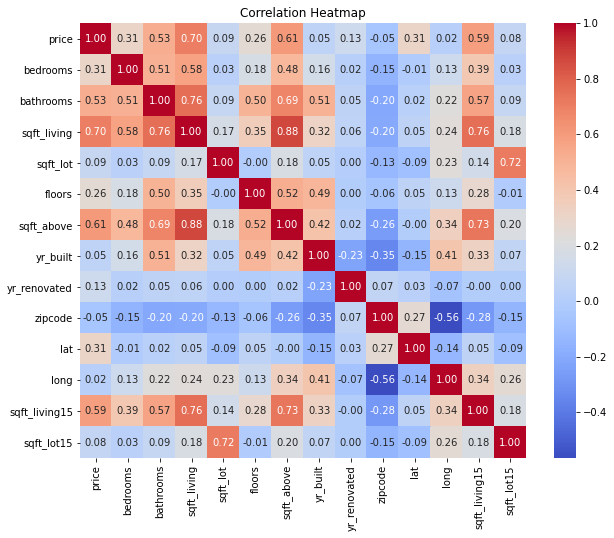

In [38]:
# Creating a heatmap using seaborn


corr_matrix = numeric_df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
ax.set_title('Correlation Heatmap');


- The heatmap visualization displays the correlation matrix of numerical features, helping identify relationships between variables. Strong positive correlations (close to 1) suggest variables tend to increase together, while strong negative correlations (close to -1) indicate an inverse relationship. Weak correlations (close to 0) suggest no linear relationship. This aids in understanding factors influencing property prices and refining predictive models for better decision-making.



# REGRESSION ANALYSIS

### Train/Test Split
Conduct a Train/Test split to our dataset to ensure the set of values to be used maintain oneness and use unseen data to prevent noise etc

In [39]:
#Define features to be used
features = ["bedrooms", "bathrooms", "sqft_living","sqft_living15", "sqft_lot","floors", "sqft_above","yr_built", "yr_renovated", "zipcode"]
target = "price"

In [40]:
x = numeric_df[features]
y = numeric_df[target]

#perfom train/test split with 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [41]:
#shape of our split data
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(17277, 10) (17277,)
(4320, 10) (4320,)


In [42]:
#explore our data
print("Training set - Features:")
print(x_train.head())
print("\nTraining set - Target:")
print(y_train.head())
print("\nTesting set - Features:")
print(x_test.head())
print("\nTesting set - Target:")
print(y_test.head())

Training set - Features:
            bedrooms  bathrooms  sqft_living  sqft_living15  sqft_lot  floors  \
id                                                                              
9834201100         4       2.00         1440           1300      4855     2.0   
7795810110         3       1.75         1430           1310      9857     1.0   
1853081250         4       2.75         3120           3200      5000     2.0   
2558630350         4       2.50         2060           1760      6958     1.0   
3362401000         3       2.00         2500           1550      4080     1.5   

            sqft_above  yr_built  yr_renovated  zipcode  
id                                                       
9834201100        1440      1972           0.0    98144  
7795810110        1140      1980           0.0    98045  
1853081250        3120      2010           0.0    98074  
2558630350        1220      1974           NaN    98034  
3362401000        1680      1922           0.0    98103  



In [43]:
#Find out which columns have highest correlation to the price to determine which features best to use for our models as a higher correlation means the target is affected by increase/decrease of the other
correlation = numeric_df.corr()["price"].abs().sort_values(ascending=False)
correlation

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
long             0.022036
Name: price, dtype: float64

From our results, we can deduce other than price(which is the target), sqft_living and sqft_above have the highest correlation efficients to the target hence very suitable to use in our SLR models

## SIMPLE LINEAR REGRESSION

### Model 1 (SLR)
### Sqft_ Living Area Impact on Property Value

In [44]:
X_base = new_df[['sqft_living']]
y = new_df['price']
# Library to be used in building the model
import statsmodels.api as sm

# Building the model
baseline_model = sm.OLS(y, sm.add_constant(X_base))

# fitting the model
baseline_results = baseline_model.fit()

# viewing the summary of the model
print(baseline_results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                 1.091e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:50:30   Log-Likelihood:            -2.0664e+05
No. Observations:               15257   AIC:                         4.133e+05
Df Residuals:                   15255   BIC:                         4.133e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.837e+04   4097.802     24.005      

### Overall Interpretation and Analysis of Model 1(SLR)

From this Simple Linear regression model,where wee focused on Square foot living and how it impacts property value we can deduce;
* This model explains approximately 49.2% of variance in property value as shown by the R-squared value
* The model as a whole is statsistically significant as shown by a relatively Large F-stat and corresponding small P-value
* Coefficient for sqft_living indicates for an additional square foot, the price of the property increases by approximately $282.20
Overall this SLR model suggests that sqft_living(areao occupied by property) is a significant predictor for property value, however there is room for improvement.

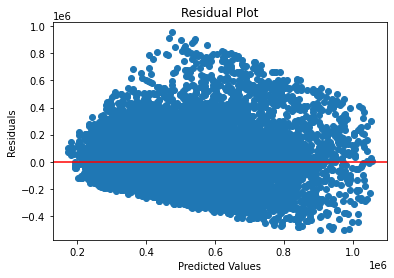

In [45]:
# Get the predicted values from the model
y_pred = baseline_results.predict(sm.add_constant(X_base))

# Calculate the residuals
residuals = y - y_pred

# Plot the residuals against the predicted values
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0
plt.show()

## MULTIPLE LINEAR REGRESSION

### MODEL 1 (MLR)
#### Bedrooms, Sqft_living,sqft_lot,yr_built,yr_renovated,bathrooms and floors impact on property value

In [46]:
X_model1 = new_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'yr_built', 'yr_renovated']]
y = new_df[['price']]

model1 = sm.OLS(y, sm.add_constant(X_model1))
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     2077.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:50:31   Log-Likelihood:            -2.0564e+05
No. Observations:               15257   AIC:                         4.113e+05
Df Residuals:                   15249   BIC:                         4.114e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.976e+06   1.23e+05     40.499   

### Overall Interpretation and Analysis of Model 1(MLR)

- The regression model examines how various features such as bedrooms, bathrooms, square footage of living area, square footage of the lot, number of floors, year built, and year renovated impact property prices. 
- The model explains approximately 48.8% of the variability in prices. 
- All features are statistically significant predictors of price, with each additional square foot of living area contributing approximately $222.61 to the property's value. 
- However, potential issues with multicollinearity and non-normality of residuals may exist.

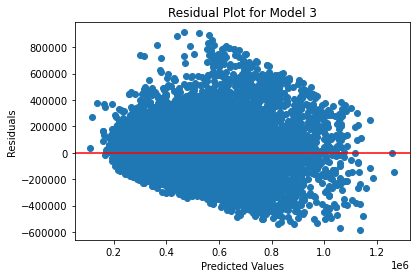

In [47]:
# Get the predicted values from the model
y_pred_model1 = results1.predict(sm.add_constant(X_model1))

# Calculate the residuals
residuals_model1 = y.values.flatten() - y_pred_model1

# Plot the residuals against the predicted values
plt.scatter(y_pred_model1, residuals_model1)
plt.title('Residual Plot for Model 3')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0
plt.show()


In [48]:
# Calculate RMSE
mse_model1 = mean_squared_error(y, y_pred_model1)
rmse_model1 = np.sqrt(mse_model1)
print("Root Mean Squared Error (RMSE) for Model 3:", rmse_model1)

Root Mean Squared Error (RMSE) for Model 3: 172777.4296484916


- The RMSE (Root Mean Square Error) for Model 3 is approximatel 172,777 . This value represents the average difference between the actual property prices and the prices predicted by the model. 

- A lower RMSE indicates that the model's predictions are closer to the actual values, suggesting better overall performance. However, the interpretation of RMSE should be considered in the context of the data and the problem domain. In this case, with an RMSE of 172,777, the model's predictions may still have a considerable amount of error compared to the actual property prices.

- Therefore, while Model 3 explains around 48.8% of the variance in property prices based on the included features (Bedrooms, Sqft_living,sqft_lot,yr_built,yr_renovated,bathrooms and floors ), the RMSE suggests that there is still room for improvement in predicting property values accurately.

### MODEL 2(MLR)
### Sqft_living , Sqft_lot,waterfront,floors,yr_built,yr_renovated,bedrooms and Bathrooms impact on Property Value

In [49]:
X_model2 = new_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront' ,'floors','yr_built', 'yr_renovated','condition']]
X_one = pd.get_dummies(X_model2, columns=['condition'], drop_first=True)
X_one.columns = X_one.columns.str.replace(' ', '')
model2 = sm.OLS(y, sm.add_constant(X_one))
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     1251.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:50:32   Log-Likelihood:            -2.0552e+05
No. Observations:               15257   AIC:                         4.111e+05
Df Residuals:                   15244   BIC:                         4.112e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.724e+06   1.29

### Overall Interpretation and Analysis of Model 2(MLR)

From this Multi Linear Regression model, we focused on Sqft_living,Sqft_lot,waterfront,floors,yr_built,yr_renovated,bedrooms and Bathroomsimpact on Property Value and we can deduce;

* This model explains approximately 49.6% variance in prediction for property value from the R-squared value

* The model is statistically significant as shown by our F-stat 1251 and corresponding P-value close to zero

Overally this model shows a moderate predictive power.However in this case the 'bathrooms' variable may not be statistically significant in house prices for this model.Further investication and refining proves this model has room for improvement.


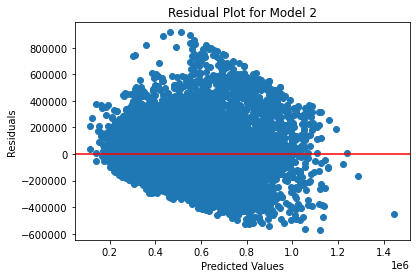

In [50]:
# Get the predicted values from the model
y_pred_model2 = results2.predict(sm.add_constant(X_one))

# Calculate the residuals
residuals_model2 = y.values.flatten() - y_pred_model2

# Plot the residuals against the predicted values
plt.scatter(y_pred_model2, residuals_model2)
plt.title('Residual Plot for Model 2')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0
plt.show()

In [51]:
# Calculate RMSE
mse_model2 = mean_squared_error(y, y_pred_model2)
rmse_model2 = np.sqrt(mse_model2)
print("Root Mean Squared Error (RMSE) for Model 2:", rmse_model2)


Root Mean Squared Error (RMSE) for Model 2: 171405.68536404817


- Model 2 considers the impact of various factors such as bedrooms, bathrooms, square footage of living area, square footage of the lot, waterfront, floors, year built, year renovated, and property condition on property prices.

- The model explains approximately 49.6% of the variability in prices. Each additional square foot of living area contributes approximately $220.58 to the property's value.

- However, there may be issues with multicollinearity or other numerical problems due to the large condition number. The Root Mean Squared Error (RMSE) for Model 2 is approximately 171,405, indicating the average difference between the observed and predicted values of property prices.

### MODEL 3(MLR)
### Sqft_living , Sqft_lot,waterfront,floors,yr_built,yr_renovated,bedrooms and Bathrooms,grade impact on Property Value

In [52]:
X_model3 = new_df[['bedrooms', 'bathrooms', 'sqft_living','waterfront' , 'sqft_lot', 'floors','yr_built', 'yr_renovated','grade']]
X_two = pd.get_dummies(X_model3, columns=['grade'], drop_first=True)
X_two.columns = X_two.columns.str.replace(' ', '')

model3 = sm.OLS(y, sm.add_constant(X_two))
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     1327.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:50:33   Log-Likelihood:            -2.0382e+05
No. Observations:               15257   AIC:                         4.077e+05
Df Residuals:                   15239   BIC:                         4.078e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6.694e+06   1.14e+0

### Overall Interpretation and Analysis of Model 3(MLR)

- Model 3 is a multiple linear regression model analyzing the impact of various factors on property prices. It includes features such as bedrooms, bathrooms, square footage, waterfront status, floors, year built, year renovated, and property grade. 
- The model explains about 59.7% of price variability, with waterfront status, square footage, and property grade showing significant impacts. However, the significance of year renovated is uncertain. Further analysis may be needed to address potential issues like multicollinearity.



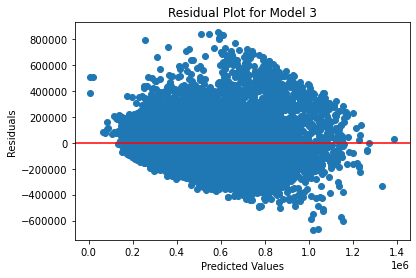

In [53]:
# Get the predicted values from the model
y_pred_model3 = results3.predict(sm.add_constant(X_two))

# Calculate the residuals
residuals_model3 = y.values.flatten() - y_pred_model3

# Plot the residuals against the predicted values
plt.scatter(y_pred_model3, residuals_model3)
plt.title('Residual Plot for Model 3')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0
plt.show()


In [54]:
# Calculate RMSE
mse_model3 = mean_squared_error(y, y_pred_model3)
rmse_model3 = np.sqrt(mse_model3)
print("Root Mean Squared Error (RMSE) for Model 3:", rmse_model3)

Root Mean Squared Error (RMSE) for Model 3: 153308.7088019953


The RMSE (Root Mean Squared Error) for Model 3 is approximately 153,308. This means that, on average, the predicted property values from Model 3 are off by about $153,308 compared to the actual values. Lower RMSE values indicate better predictive accuracy. 


### MODEL 4(MLR)
### Sqft_living , Sqft_lot,waterfront,floors,yr_built,yr_renovated,bedrooms and Bathrooms,grade,view impact on Property Value

In [55]:
X_model4 = new_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront' ,'yr_built', 'yr_renovated','grade','view']]
X_three = pd.get_dummies(X_model4, columns=['grade', 'view'], drop_first=True)
X_three.columns = X_three.columns.str.replace(' ', '')

model4 = sm.OLS(y, sm.add_constant(X_three))
results4 = model4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     1123.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:50:33   Log-Likelihood:            -2.0362e+05
No. Observations:               15257   AIC:                         4.073e+05
Df Residuals:                   15235   BIC:                         4.074e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6.464e+06   1.13e+0

### Overall Interpretation and Analysis of Model 4(MLR)


Model 4 is a multiple linear regression model that examines the impact of various features on property prices. It includes factors such as bedrooms, bathrooms, square footage, waterfront status, floors, year built, year renovated, property grade, and view. The model explains approximately 60.7% of the variability in property prices.

Key findings from the model include:

- Bedrooms, bathrooms, square footage, waterfront status, floors, year built, property grade, and certain view categories (Excellent, Fair, Good) are significant predictors of property prices.
- Some grade categories (Poor, Low, LowAverage, Average, Good, Better) and view categories (Fair, None) are negatively associated with property prices.
- However, the significance of the year renovated feature is uncertain, as indicated by its high p-value.

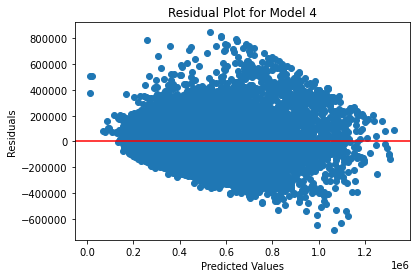

In [56]:
# Get the predicted values from the model
y_pred_model4 = results4.predict(sm.add_constant(X_three))

# Calculate the residuals
residuals_model4 = y.values.flatten() - y_pred_model4

# Plot the residuals against the predicted values
plt.scatter(y_pred_model4, residuals_model4)
plt.title('Residual Plot for Model 4')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0
plt.show()

In [57]:
# Calculate RMSE
mse_model4 = np.mean(residuals_model4**2)
rmse_model4 = np.sqrt(mse_model4)
print("Root Mean Squared Error (RMSE) for Model 4:", rmse_model4)

Root Mean Squared Error (RMSE) for Model 4: 151290.87497789308


## Recommended Model 

Comparing the RMSE values of the four models:

- Model 1 (RMSE: 172777.4296)
- Model 2 (RMSE: 171405.685)
- Model 3 (RMSE: 153308.70)
- Model 4 (RMSE: 151290.87)

We can observe that Model 4 has the lowest RMSE among the three models, indicating that it performs better in predicting property values compared to Models 1,2 and 3. 


This suggests that the features included in Model 4 (Sqft_living , Sqft_lot,waterfront,floors,yr_built,yr_renovated,bedrooms and Bathrooms,grade,view) provide better predictive power for property values than the features in Models 1,2 and 3.


Therefore, Model 4 may be considered the most effective among the three models in predicting property values based on the given features.